# **Proyecto 2: AnaÃÅlisis Exploratorio**
- Brandon Sicay 21757
- Daniel Morales 21785
- Diana Fern√°ndez 21747
- Jennifer Toxc√≥n 21276

El diagn√≥stico r√°pido y preciso de fracturas en la columna cervical es crucial para evitar el deterioro neurol√≥gico y la par√°lisis en los pacientes, especialmente despu√©s de un trauma. Aunque la tomograf√≠a computarizada ha reemplazado a los rayos X en la detecci√≥n de fracturas, la presencia de enfermedades degenerativas y osteoporosis en pacientes de edad avanzada dificulta la identificaci√≥n precisa de las fracturas. La creciente demanda de an√°lisis r√°pidos y precisos en la radiolog√≠a requiere soluciones con IA para mejorar la detecci√≥n y localizaci√≥n de fracturas en la columna cervical.

La tarea consiste en determinar, a partir de im√°genes de TC, si hay fracturas en alguna de las siete v√©rtebras que componen la columna cervical (C1-C7). Se ignoran las fracturas en la base del cr√°neo, la columna tor√°cica, las costillas y las clav√≠culas.

El modelo debe determinar si hay fracturas y en qu√© v√©rtebras se producen. Por paciente se esperan 8 resultados: Una para cada una de las siete v√©rtebras cervicales y una ¬´any¬ª que indica si el paciente tiene o no alg√∫n tipo de fractura.

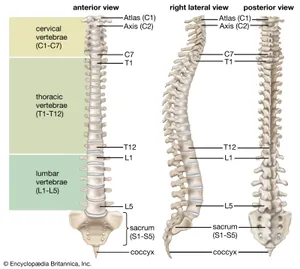

Adem√°s de identificar fracturas en las v√©rtebras cervicales, el rendimiento del modelo se eval√∫a usando una m√©trica de p√©rdida logar√≠tmica ponderada (log loss). Esta m√©trica mide qu√© tan bien las predicciones probabil√≠sticas del modelo se ajustan a los resultados reales, penalizando m√°s severamente los errores de predicci√≥n.

La f√≥rmula del log loss es la siguiente:

$$
L_{ij} = - w_j \left( y_{ij} \log(p_{ij}) + (1 - y_{ij}) \log(1 - p_{ij}) \right)
$$



Donde:

- ùë¶ùëñùëó es la etiqueta verdadera para la predicci√≥n ùëó (1 si hay fractura, 0 si no).
- ùëùùëñùëó es la probabilidad predicha por el modelo.
- ùë§ùëó es el peso asignado a cada tipo de predicci√≥n.




#### Pesos

La competencia otorga diferentes pesos a los tipos de predicciones para reflejar su relevancia:

- Fractura negativa en una v√©rtebra: Peso de 1 (menos severo si no hay fractura).
- Fractura positiva en una v√©rtebra: Peso de 2 (m√°s importante si hay fractura en una v√©rtebra).
- Sin fractura en el paciente (global): Peso de 7.
- Fractura positiva en el paciente (global): Peso de 14 (m√°s cr√≠tico identificar correctamente si el paciente tiene alguna fractura en general).


### Ejemplo:
Si el modelo falla en predecir correctamente que un paciente tiene una fractura global, el error se multiplica por 14, destacando la importancia de predecir correctamente la fractura global en comparaci√≥n con la predicci√≥n de una v√©rtebra individual.

Esta m√©trica no solo eval√∫a si el modelo predice correctamente, sino tambi√©n la confianza que el modelo tiene en sus predicciones. Los errores en fracturas globales del paciente se penalizan mucho m√°s que en fracturas espec√≠ficas, resaltando la necesidad de que el modelo sea especialmente preciso en identificar si el paciente tiene fracturas o no.

### Problema cient√≠fico
¬øC√≥mo puede la IA mejorar la precisi√≥n y velocidad en la detecci√≥n y localizaci√≥n de fracturas en la columna cervical a trav√©s de im√°genes de tomograf√≠a computarizada, igualando o superando el rendimiento de los radi√≥logos expertos?

### Objetivo General
Desarrollar un modelo capaz de detectar y localizar con precisi√≥n fracturas en las v√©rtebras cervicales (C1-C7) utilizando im√°genes de tomograf√≠a computarizada (CT), con el objetivo de mejorar la velocidad y precisi√≥n en el diagn√≥stico m√©dico.

### Objetivos
- Desarrollar un modelo de aprendizaje autom√°tico que detecte y localice fracturas en las siete v√©rtebras cervicales (C1-C7) a partir de im√°genes de CT.
- Crear un sistema que pueda identificar la existencia de cualquier fractura vertebral en un paciente con alta precisi√≥n.
- Reducir el tiempo de diagn√≥stico y aumentar la precisi√≥n en la identificaci√≥n de fracturas cervicales en pacientes con im√°genes complejas, como aquellos con degeneraci√≥n o enfermedades √≥seas.
- Comparar los resultados del modelo con la evaluaci√≥n de radi√≥logos para validar su efectividad.

## Descripci√≥n del conjunto de datos

El conjunto de datos est√° compuesto por aproximadamente 3,000 estudios de tomograf√≠a computarizada (CT) que cubren las v√©rtebras cervicales (C1-C7) y se obtuvo de 12 sitios diferentes alrededor del mundo. 

Los datos incluyen im√°genes en formato DICOM de alta resoluci√≥n y etiquetas proporcionadas por radi√≥logos que indican la presencia y localizaci√≥n de fracturas. Tambi√©n se proporcionan segmentaciones de las v√©rtebras mediante un modelo UNET 3D, revisadas por radi√≥logos para su precisi√≥n. Adem√°s, se incluye un conjunto de datos de cajas delimitadoras para un subconjunto de las im√°genes, con el objetivo de facilitar el entrenamiento del modelo para identificar fracturas espec√≠ficas.


### Variables

- StudyInstanceUID: ID √∫nico del estudio de imagen para cada paciente.

- patient_overall: Indica si existe alguna fractura en cualquier v√©rtebra cervical para el paciente.

- C1, C2, C3, C4, C5, C6, C7: Variables binarias que indican la presencia o ausencia de fracturas en las v√©rtebras espec√≠ficas.

- StudyInstanceUID: ID √∫nico del estudio de imagen.

- x y y: Coordenadas m√≠nimas de la caja delimitadora que encierra la fractura.

- width: Coordenadas m√°ximas de la caja delimitadora.

- C1, C2, C3, C4, C5, C6, C7: Identificadores de las v√©rtebras en las que se encuentran las fracturas C1-C7.

- row_id: ID √∫nico correspondiente a la predicci√≥n.

- fractured: La probabilidad de que haya una fractura en la v√©rtebra o en el paciente (patient_overall).


In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Leer los archivos CSV
train_df = pd.read_csv('./data_cervical/train.csv')
test_df= pd.read_csv('./data_cervical/test.csv')
train_bounding_boxes= pd.read_csv('./data_cervical/train_bounding_boxes.csv')
sample_submission = pd.read_csv('./data_cervical/sample_submission.csv')

In [4]:
print("Train data:")
print(train_df.head())

Train data:
            StudyInstanceUID  patient_overall  C1  C2  C3  C4  C5  C6  C7
0   1.2.826.0.1.3680043.6200                1   1   1   0   0   0   0   0
1  1.2.826.0.1.3680043.27262                1   0   1   0   0   0   0   0
2  1.2.826.0.1.3680043.21561                1   0   1   0   0   0   0   0
3  1.2.826.0.1.3680043.12351                0   0   0   0   0   0   0   0
4   1.2.826.0.1.3680043.1363                1   0   0   0   0   1   0   0


In [7]:
train_df

StudyInstanceUID  patient_overall  C1  C2  C3  C4  C5  C6  C7
0      1.2.826.0.1.3680043.6200                1   1   1   0   0   0   0   0
1     1.2.826.0.1.3680043.27262                1   0   1   0   0   0   0   0
2     1.2.826.0.1.3680043.21561                1   0   1   0   0   0   0   0
3     1.2.826.0.1.3680043.12351                0   0   0   0   0   0   0   0
4      1.2.826.0.1.3680043.1363                1   0   0   0   0   1   0   0
...                         ...              ...  ..  ..  ..  ..  ..  ..  ..
2014  1.2.826.0.1.3680043.21684                1   0   1   0   0   0   1   1
2015   1.2.826.0.1.3680043.4786                1   0   0   0   0   0   0   1
2016  1.2.826.0.1.3680043.14341                0   0   0   0   0   0   0   0
2017  1.2.826.0.1.3680043.12053                0   0   0   0   0   0   0   0
2018  1.2.826.0.1.3680043.18786                1   0   0   0   0   0   0   1

[2019 rows x 9 columns]

In [8]:
# Ver las primeras filas de cada DataFrame
print("Train data:")
print(test_df.head())

Train data:
                         row_id           StudyInstanceUID prediction_type
0  1.2.826.0.1.3680043.10197_C1  1.2.826.0.1.3680043.10197              C1
1  1.2.826.0.1.3680043.10454_C1  1.2.826.0.1.3680043.10454              C1
2  1.2.826.0.1.3680043.10690_C1  1.2.826.0.1.3680043.10690              C1


- StudyInstanceUID: ID √∫nico del estudio de imagen para cada paciente.

- patient_overall: Indica si existe alguna fractura en cualquier v√©rtebra cervical para el paciente.

- C1, C2, C3, C4, C5, C6, C7: Variables binarias que indican la presencia o ausencia de fracturas en las v√©rtebras espec√≠ficas.

In [9]:
test_df

row_id           StudyInstanceUID prediction_type
0  1.2.826.0.1.3680043.10197_C1  1.2.826.0.1.3680043.10197              C1
1  1.2.826.0.1.3680043.10454_C1  1.2.826.0.1.3680043.10454              C1
2  1.2.826.0.1.3680043.10690_C1  1.2.826.0.1.3680043.10690              C1

- row_id: El ID de la fila. Coincidir√° con la misma columna del archivo de env√≠o de muestras.
- StudyInstanceUID: ID del estudio que es √∫nico para cada exploraci√≥n de paciente.
- prediction_type: Cu√°l de las ocho columnas objetivo necesita una predicci√≥n en esta fila.

In [11]:
train_bounding_boxes

StudyInstanceUID          x          y     width    height  \
0     1.2.826.0.1.3680043.10051  219.27715  216.71419  17.30440  20.38517   
1     1.2.826.0.1.3680043.10051  221.56460  216.71419  17.87844  25.24362   
2     1.2.826.0.1.3680043.10051  216.82151  221.62546  27.00959  26.37454   
3     1.2.826.0.1.3680043.10051  214.49455  215.48637  27.92726  37.51363   
4     1.2.826.0.1.3680043.10051  214.00000  215.48637  27.00000  43.51363   
...                         ...        ...        ...       ...       ...   
7212   1.2.826.0.1.3680043.9940  297.23186  115.53983  85.18228  66.52623   
7213   1.2.826.0.1.3680043.9940  298.00000  117.00000  86.00000  61.00000   
7214   1.2.826.0.1.3680043.9940  298.00000  119.00000  87.00000  58.00000   
7215   1.2.826.0.1.3680043.9940  299.00000  120.00000  89.00000  56.00000   
7216   1.2.826.0.1.3680043.9940  299.04425  121.88319  89.71326  53.46549   

      slice_number  
0              133  
1              134  
2              135  
3              136  
4              137  
...            ...  
7212           140  
7213           141  
7214           142  
7215           143  
7216           144  

[7217 rows x 6 columns]

- StudyInstanceUID: ID del estudio que es √∫nico para cada paciente escaneado.
- x: coordenada x de la esquina inferior izquierda del cuadro delimitador.
- y: coordenada y de la esquina inferior izquierda del cuadro delimitador.
- width: anchura del cuadro delimitador
- height: altura del cuadro delimitador
- slice_number: n√∫mero de corte del escaneado

In [13]:
# Ver las primeras filas de cada DataFrame
print("Sample submission:")
print(sample_submission.head())

Sample submission:
                         row_id  fractured
0  1.2.826.0.1.3680043.10197_C1        0.5
1  1.2.826.0.1.3680043.10454_C1        0.5
2  1.2.826.0.1.3680043.10690_C1        0.5


In [14]:
sample_submission

row_id  fractured
0  1.2.826.0.1.3680043.10197_C1        0.5
1  1.2.826.0.1.3680043.10454_C1        0.5
2  1.2.826.0.1.3680043.10690_C1        0.5

- row_id: √önico para cada escaneo de paciente incluyendo las v√©rtebras afectadas.
- fractured: Columna objetivo con predicci√≥n.

## An√°lisis exploratorio

An√°lisis 

El desglose global de los datos es 1058 (52,4% sin fractura) y 961 (47,6% con fractura). De los pacientes con fracturas, hay varios que tienen m√°s de una.

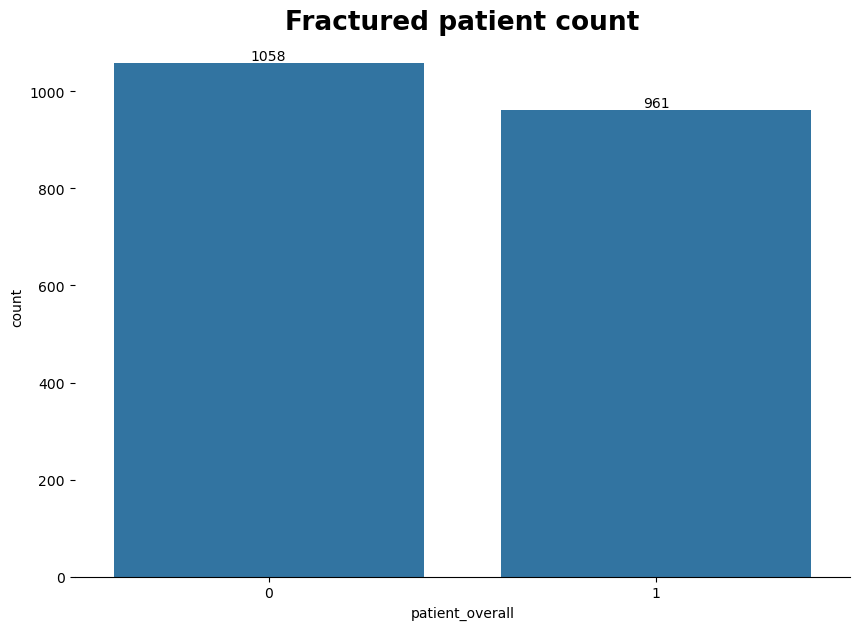

In [5]:
plt.figure(figsize=(10, 7))
ax = sns.countplot(data=train_df, x="patient_overall")
for container in ax.containers:
    ax.bar_label(container)
ax.set_title("Fractured patient count", weight="bold", size=19)
sns.despine(right=True, top=True, left=True);

(0.0, 2800.0)

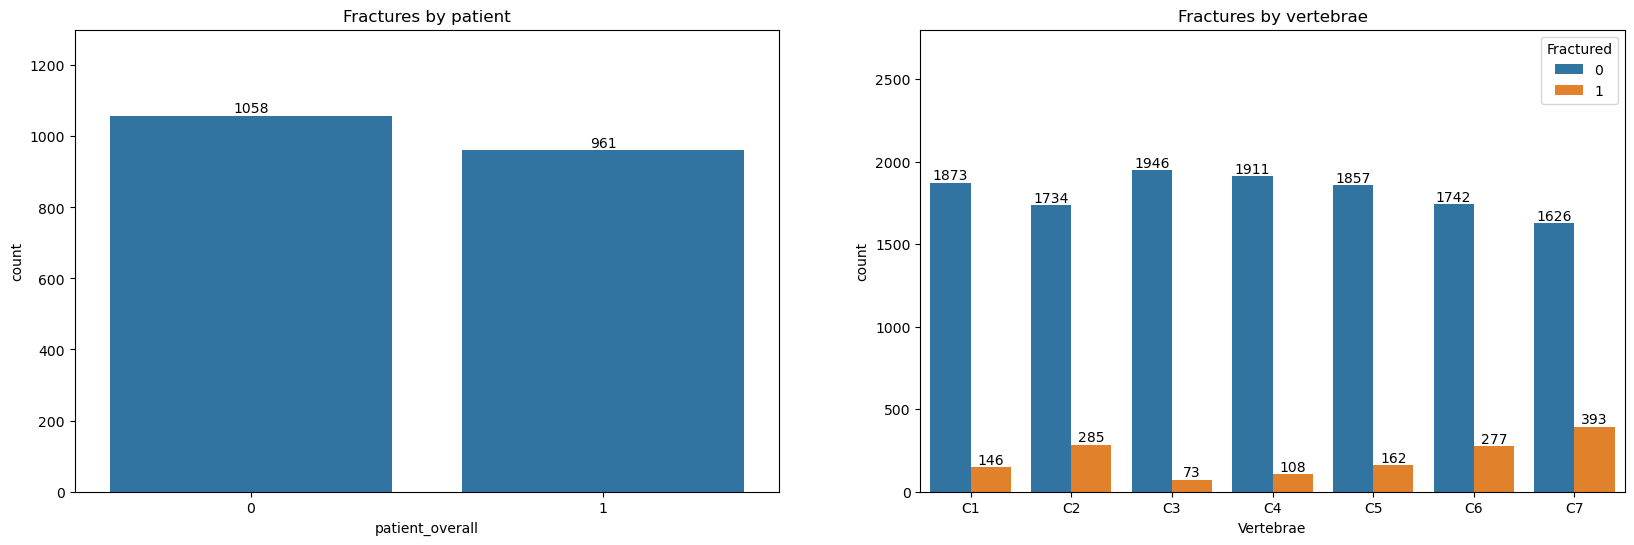

In [6]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
ax1 = sns.countplot(data=train_df, x='patient_overall')
for container in ax1.containers:
    ax1.bar_label(container)
plt.title('Fractures by patient')
plt.ylim([0,1300])

# Unpivot train_df for plotting
train_melt = pd.melt(train_df, id_vars = ['StudyInstanceUID', 'patient_overall'],
             value_vars = ['C1','C2','C3','C4','C5','C6','C7'],
             var_name="Vertebrae",
             value_name="Fractured")

plt.subplot(1,2,2)
ax2 = sns.countplot(data=train_melt, x='Vertebrae', hue='Fractured')
for container in ax2.containers:
    ax2.bar_label(container)
plt.title('Fractures by vertebrae')
plt.ylim([0,2800])


La mayor√≠a de las fracturas aparecen en las v√©rtebras superiores e inferiores, siendo C7 (27,22%) y C2 (19,74%) las que presentan la mayor proporci√≥n. C3 (5,06%) y C4 (7,48%) tienen la porci√≥n m√°s baja.

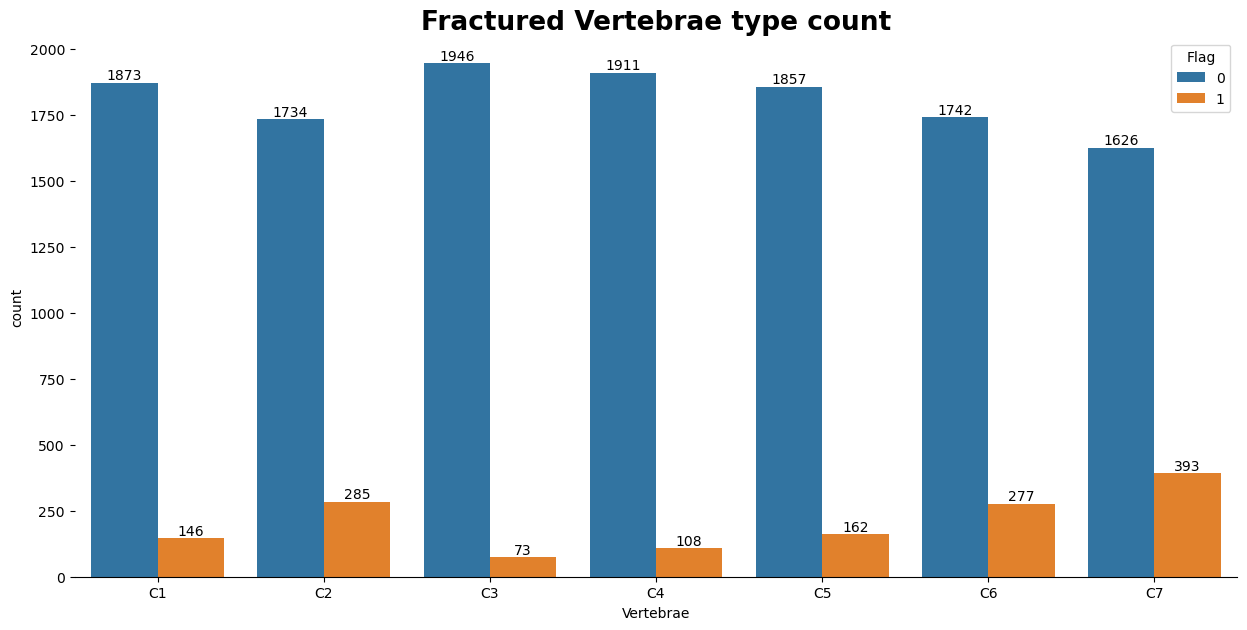

In [7]:
data_count = pd.melt(train_df, 
             id_vars=['StudyInstanceUID', 'patient_overall'],
             var_name="Vertebrae",
             value_name="Flag")

plt.figure(figsize=(15, 7))
ax = sns.countplot(data=data_count, x="Vertebrae", hue="Flag")
for container in ax.containers:
    ax.bar_label(container)
ax.set_title("Fractured Vertebrae type count", weight="bold", size=19)
sns.despine(right=True, top=True, left=True);

In [8]:
percentage_table = data_count[["Vertebrae","Flag"]].groupby("Vertebrae").sum()
percentage_table["percentage"] = np.round((percentage_table["Flag"] / percentage_table["Flag"].sum())*100,2)
percentage_table

Flag  percentage
Vertebrae                  
C1          146       10.11
C2          285       19.74
C3           73        5.06
C4          108        7.48
C5          162       11.22
C6          277       19.18
C7          393       27.22

Si un paciente tiene varias fracturas, es m√°s probable que est√©n en una v√©rtebra lim√≠trofe. Por ejemplo, es m√°s probable que una fractura en C1 est√© junto a una fractura en C2 que en C5.

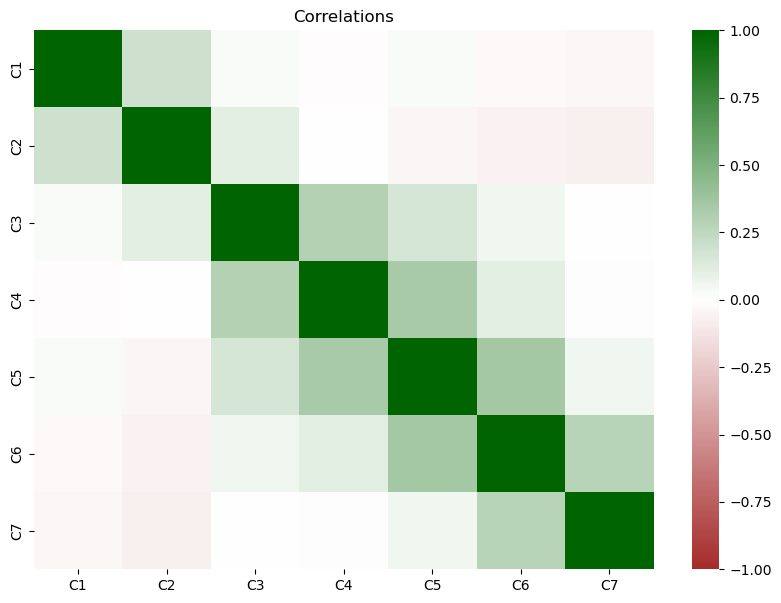

In [16]:
from matplotlib.colors import LinearSegmentedColormap

plt.figure(figsize=(10,7))

# Crear un colormap personalizado
colors = [(165/255, 42/255, 42/255), (1, 1, 1), (0, 100/255, 0)]  # Rojo oscuro -> Blanco -> Verde oscuro
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

corr = train_df[['C1','C2','C3','C4','C5','C6','C7']].corr()

# Graficar el heatmap con el nuevo colormap
sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1)

plt.title('Correlations')
plt.show()

### ID de los pacientes
Cada paciente tiene un ID √∫nico que se utiliza para identificarlo. Este es tambi√©n el ID que debe utilizarse para la salida (env√≠o) en combinaci√≥n con las v√©rtebras y la evaluaci√≥n global 

In [20]:
for x in range(20):
    print(train_df["StudyInstanceUID"][x])

1.2.826.0.1.3680043.6200
1.2.826.0.1.3680043.27262
1.2.826.0.1.3680043.21561
1.2.826.0.1.3680043.12351
1.2.826.0.1.3680043.1363
1.2.826.0.1.3680043.4859
1.2.826.0.1.3680043.18659
1.2.826.0.1.3680043.17364
1.2.826.0.1.3680043.849
1.2.826.0.1.3680043.24045
1.2.826.0.1.3680043.4744
1.2.826.0.1.3680043.15773
1.2.826.0.1.3680043.24946
1.2.826.0.1.3680043.9290
1.2.826.0.1.3680043.5482
1.2.826.0.1.3680043.11090
1.2.826.0.1.3680043.13810
1.2.826.0.1.3680043.28252
1.2.826.0.1.3680043.26052
1.2.826.0.1.3680043.4131


Al mirar los ID de los estudios, surge la suposici√≥n de que s√≥lo los n√∫meros despu√©s del √∫ltimo per√≠odo son √∫nicos (samuelcortinhas, 2022).

In [24]:
for i in range(7):
    print(train_df['StudyInstanceUID'].map(lambda x : x.split('.')[i]).unique())

['1']
['2']
['826']
['0']
['1']
['3680043']
['6200' '27262' '21561' ... '14341' '12053' '18786']


Referencias

Cortinhas, S. (2022). RSNA Fracture Detection - in-depth EDA. https://www.kaggle.com/code/samuelcortinhas/rsna-fracture-detection-in-depth-eda

Mayo Clinic. (2024). Fracturas (huesos fracturados). https://www.mayoclinic.org/es/first-aid/first-aid-fractures/basics/art-20056641